# Iris의 품종 분류하기

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#문제-정의" data-toc-modified-id="문제-정의-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>문제 정의</a></span></li><li><span><a href="#데이터-준비" data-toc-modified-id="데이터-준비-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>데이터 준비</a></span><ul class="toc-item"><li><span><a href="#데이터-확인하기" data-toc-modified-id="데이터-확인하기-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>데이터 확인하기</a></span><ul class="toc-item"><li><span><a href="#data" data-toc-modified-id="data-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>data</a></span></li><li><span><a href="#feature_names" data-toc-modified-id="feature_names-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>feature_names</a></span></li><li><span><a href="#target" data-toc-modified-id="target-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>target</a></span></li><li><span><a href="#target_names" data-toc-modified-id="target_names-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>target_names</a></span></li><li><span><a href="#filename" data-toc-modified-id="filename-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>filename</a></span></li><li><span><a href="#DESCR" data-toc-modified-id="DESCR-2.1.6"><span class="toc-item-num">2.1.6&nbsp;&nbsp;</span>DESCR</a></span></li></ul></li><li><span><a href="#데이터-시각화" data-toc-modified-id="데이터-시각화-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>데이터 시각화</a></span></li><li><span><a href="#데이터-나누기" data-toc-modified-id="데이터-나누기-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>데이터 나누기</a></span></li></ul></li><li><span><a href="#모델-구현" data-toc-modified-id="모델-구현-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>모델 구현</a></span><ul class="toc-item"><li><span><a href="#모델-생성하기" data-toc-modified-id="모델-생성하기-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>모델 생성하기</a></span></li><li><span><a href="#모델-학습하기" data-toc-modified-id="모델-학습하기-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>모델 학습하기</a></span></li></ul></li><li><span><a href="#검증" data-toc-modified-id="검증-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>검증</a></span></li><li><span><a href="#다른-모델-사용해보기" data-toc-modified-id="다른-모델-사용해보기-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>다른 모델 사용해보기</a></span><ul class="toc-item"><li><span><a href="#랜덤포레스트" data-toc-modified-id="랜덤포레스트-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>랜덤포레스트</a></span></li></ul></li><li><span><a href="#Support-Vector-Machine-(SVM)" data-toc-modified-id="Support-Vector-Machine-(SVM)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Support Vector Machine (SVM)</a></span></li><li><span><a href="#Stochastic-Gradient-Descent-Classifier-(SGDClassifier)" data-toc-modified-id="Stochastic-Gradient-Descent-Classifier-(SGDClassifier)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Stochastic Gradient Descent Classifier (SGDClassifier)</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#마치며" data-toc-modified-id="마치며-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>마치며</a></span></li></ul></div>

## 문제 정의

iris의 세 가지 품종, setosa, versicolor, virginica를 **꽃잎**과 **꽃받침**의 크기로 분류해보자.

+ petal은 꽃잎, sepal은 꽃받침이다.

## 데이터 준비

+ 머신러닝 라이브러리 중 하나인 사이킷런(scikit-learn)에 내장되어 있는 데이터를 사용한다.
+ [Iris plants dataset의 자세한 정보 보러가기](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset)
+ 아래의 코드로 아이리스 데이터를 가져올 수 있다.

```python
from sklearn.datasets import load_iris

iris = load_iris()
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('ggplot')
sns.set(font_scale=1.5) # 이 두줄은 본 필자가 항상 쓰는 방법입니다. matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고, 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.

#ignore warnings
# import warnings
# warnings.filterwarnings('ignore')
%matplotlib inline

# 아이리스 데이터
from sklearn.datasets import load_iris

# 데이터를 나눠준다.
from sklearn.model_selection import train_test_split

# 모델
from sklearn.tree import DecisionTreeClassifier # 의사결정나무 모델
from sklearn.ensemble import RandomForestClassifier # 랜덤 포레스트 모델
from sklearn import svm # 서포트 벡터 머신 모델
from sklearn.linear_model import SGDClassifier # SGD Classifier 모델
from sklearn.linear_model import LogisticRegression # 로지스틱회귀 모델

from sklearn.metrics import accuracy_score # 정확도
from sklearn.metrics import classification_report # 분류 리포트

In [2]:
iris = load_iris()
print(type(dir(iris))) # dir()는 객체가 어떤 변수와 메서드를 가지고 있는지 나열함

<class 'list'>


### 데이터 확인하기

scikit-learn 내장 데이터셋의 구성

- scikit-learn의 dataset은 딕셔너리 형태의 Bunch 클래스 객체이다.
    - keys() 함수로 key값들을 조회


- 구성
    - **target_name**: 예측하려는 값(class)을 가진 문자열 배열
    - **target**: Label(출력데이터)
    - **data**: Feature(입력변수)
    - **feature_names**: 입력변수 각 항목의 이름
    - **DESCR**: 데이터셋에 대한 설명

In [3]:
# iris 데이터의 key 확인해보기
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

iris에는 'data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'까지 총 6개의 정보가 담겨있다.

하나씩 확인해보자!

#### data

In [4]:
# 데이터 크기 확인하기
iris_data = iris.data

print(iris_data.shape) # 총 150개의 행, 4개의 열을 가지고 있다.

(150, 4)


총 150개의 데이터가 각각 4개의 정보를 담고 있다.

어떤 정보인지 확인해보자.

각각 꽃받침의 길아와 넓이, 꽃잎의 길이와 넓이이다.

In [5]:
# 샘플 데이터 확인
iris_data[0] # 0번 인덱스

array([5.1, 3.5, 1.4, 0.2])

#### feature_names

In [6]:
# feature_names 확인하기
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

#### target

다음은 우리의 목표! 타겟 데이터를 확인해보자.

In [7]:
# 타겟 출력해보기
iris_label = iris.target
print(iris_label.shape)
iris_label

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

0, 1, 2로 구성되어 있는 150개의 데이터인 것을 확인해볼 수 있다.

숫자는 무엇을 의미할까?

#### target_names

In [8]:
# taget_names 확인하기
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

+ 0 -> setosa
+ 1 -> versicolor
+ 2 -> virginica

각각의 숫자는 붓꽃의 품종을 의미한다.

#### filename

데이터셋의 파일이 저장된 경로를 보여준다.

In [9]:
iris.filename

'/home/ssac28/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/datasets/data/iris.csv'

#### DESCR

+ Description의 약자이다.
+ 데이터셋의 설명이 담겨있다.

In [10]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

데이터에셋 관한 알쓸신잡도 들어있다.

+ 데이터를 처음 누가 썼는지.
+ 어디서 처음 사용되었는지 등

In [11]:
# 데이터프레임에 아이리스 데이터 담아주기
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
# label 컬럼 추가하기
iris_df["label"] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
# label 컬럼에 값이 균등하게 있는지 확인해보기
iris_df['label'].value_counts().sort_index()

0    50
1    50
2    50
Name: label, dtype: int64

### 데이터 시각화

<Figure size 720x720 with 0 Axes>

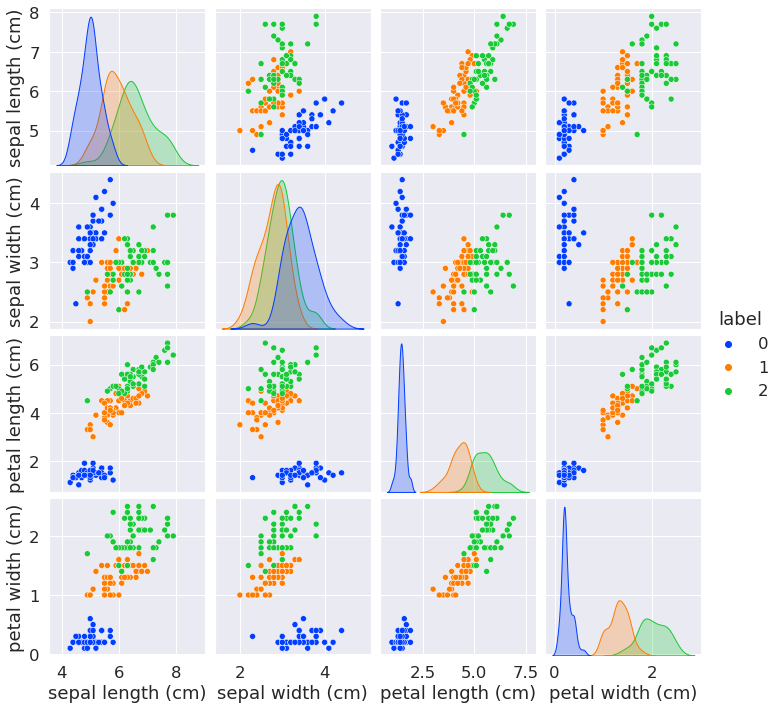

In [14]:
plt.figure(figsize=(10,10))

sns.pairplot(iris_df, hue='label', palette='bright')

plt.show()

+ 시각화로 확인해 봤을 때, 꽃잎과 꽃받침의 크기로 어느정도 분류됨을 확인할 수 있다.

### 데이터 나누기

In [15]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, # input data(feature)
                                                    iris_label, # ouput data(label or target)
                                                    test_size=0.2, # 테스트셋의 비율(전체 중 20%, 기본값은 0.25)
                                                    random_state=7) # random 시드값

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))

X_train 개수:  120 , X_test 개수:  30


> random_state?

`random_state`는 **train데이터**와 **test데이터**를 분리(split)하는데 적용되는 랜덤성을 결정합니다. 위에서 데이터를 출력했을때 라벨이 0부터 순서대로 정렬된 것을 보셨을 겁니다.

만약 이 데이터 그대로 학습용 데이터와 테스트용 데이터를 나눈다면 뒤쪽의 20%가 테스트용 데이터셋으로 만들어지기 때문에 테스트용 데이터셋은 라벨이 2인 데이터로만 구성됩니다.

이런 데이터셋을 테스트용으로 사용한다면 학습이 제대로 되었는지 확인할수가 없겠죠? 그래서 데이터를 분리할 때 랜덤으로 섞는 과정이 필요하고 `random_state`가 이 역할을 하게되는 것이죠.

컴퓨터에서의 랜덤은 아무리 랜덤이라고 해도 특정 로직에 따라 결정되는 랜덤이기 때문에 완벽한 랜덤이라고 할 수 없습니다.
그러한 랜덤을 조절할 수 있는 값이 바로 `random_state`, 또는 `random_seed`입니다. 이 값이 같다면 코드는 항상 같은 랜덤 결과를 나타냅니다.
랜덤인데 왜 같은 결과를 원하냐구요? 내가 실험한 결과를 다른 사람의 컴퓨터에서도 재현가능(reproducible) 하게 하려면 같은 랜덤시드가 필요할 때가 있답니다.
랜덤성을 조절하고 싶지 않다면, 해당 인자는 없어도 코드상의 문제는 없습니다.

+ 유명한 연구자 또는 학자분들은 각자의 시그니처 고유값이 있다고 한다.
+ 나라고 만들지 말라는 법 없지!

In [16]:
# 나눈 데이터셋 확인!
X_train.shape, y_train.shape

((120, 4), (120,))

In [17]:
X_test.shape, y_test.shape

((30, 4), (30,))

In [18]:
y_train, y_test # 0, 1, 2가 랜덤하게 섞여 있는 것을 확인할 수 있다.

(array([2, 1, 0, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 2, 1, 0, 1, 1, 2, 0, 0, 0,
        2, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 2, 2, 0, 2, 0,
        1, 2, 1, 0, 1, 0, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 2,
        0, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 0, 2, 0, 0, 1,
        1, 2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 2,
        0, 2, 1, 1, 0, 2, 1, 2, 1, 0]),
 array([2, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 2,
        1, 2, 2, 2, 1, 1, 2, 2]))

In [19]:
# 비율 확인하기
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([0, 1, 2]), array([43, 38, 39]))
(array([0, 1, 2]), array([ 7, 12, 11]))


동일한 비율로 나눠지지 않는다.

이럴 때는 `train_test_split` 메서드에 `startify` 파라미터를 사용하면 데이터의 각 클래스들을 같은 비율로 나눠준다.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, # input data(feature)
                                                    iris_label, # ouput data(label or target)
                                                    test_size=0.2, # 테스트셋의 비율(전체 중 20%, 기본값은 0.25)
                                                    stratify=iris.target, # 각 class들을 같은 비율로 나눠준다.
                                                    random_state=7) # random 시드값

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))

X_train 개수:  120 , X_test 개수:  30


In [21]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print()

# 비율 확인하기
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(120, 4) (30, 4) (120,) (30,)

(array([0, 1, 2]), array([40, 40, 40]))
(array([0, 1, 2]), array([10, 10, 10]))


일정하게 나눠진 것을 볼 수 있다!

## 모델 구현

+ Decision Tree 사용.

### 모델 생성하기

In [22]:
decision_tree = DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)

classifier


### 모델 학습하기

In [23]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

> `fit` : 학습하는 메서드

여기서 눈여겨 볼 점은 학습하는 메서드의 이름이 `fit`이라는 점입니다.
training dataset 으로 모델을 학습시킨다는 것은, 달리 말하면 training dataset에 맞게 모델을 fitting, 즉 맞추는 것이라고 할 수 있습니다.
training dataset에 있는 데이터들을 통해 어떠한 패턴을 파악하고, 그 패턴에 맞게 예측을 할 수 있도록 학습되기 때문입니다.

즉, 다른 말로 하면 모델은 training dataset에 존재하지 않는 데이터에 대해서는 정확한 정답 카테고리가 무엇인지 알지 못합니다.
다만 training dataset을 통해 학습한 패턴으로 새로운 데이터가 어떤 카테고리에 속할지 예측할 뿐이죠.

그렇기 때문에 새로운 데이터에 대해서도 잘 맞출 수 있기 위해서는 training dataset이 어떻게 구성되어 있는지가 매우 중요합니다.
더 다양한, 더 일반화 된 데이터로 학습이 될수록 새로운 데이터에 대해서도 잘 맞출 수 있는 것이죠.

## 검증

In [24]:
# test 데이터로 예측하기
y_pred = decision_tree.predict(X_test)
y_pred

array([2, 0, 0, 1, 2, 1, 2, 0, 2, 2, 1, 0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 0,
       1, 0, 2, 2, 1, 1, 0, 2])

In [25]:
# 정답
y_test

array([2, 0, 0, 1, 2, 1, 2, 0, 2, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 2, 0,
       1, 0, 2, 2, 2, 1, 0, 2])

In [26]:
# 정확도(Accuracy)로 평가하기
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9333333333333333

> 정확도(Accuracy)

정확도는 전체 개수 중 맞은 것의 개수의 수치를 나타냅니다. 다음과 같은 식으로 나타낼 수 있습니다.

$정확도 = \frac{예측한 전체 데이터의 개수}{예측 결과가 정답인 데이터의 개수}$

In [45]:
# 과정 한눈에 봐보기!
# (1) 필요한 모듈 import
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# (2) 데이터 준비
iris = load_iris()
iris_data = iris.data
iris_label = iris.target

# (3) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data, # input data(feature)
                                                    iris_label, # ouput data(label or target)
                                                    test_size=0.2, # 테스트셋의 비율(전체 중 20%, 기본값은 0.25)
                                                    stratify=iris.target, # 각 class들을 같은 비율로 나눠준다.
                                                    random_state=7) # random 시드값

# (4) 모델 학습 및 예측
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print()

print(classification_report(y_test, y_pred))

0.9333333333333333

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



## 다른 모델 사용해보기

### 랜덤포레스트

In [39]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, # input data(feature)
                                                    iris_label, # ouput data(label or target)
                                                    test_size=0.2, # 테스트셋의 비율(전체 중 20%, 기본값은 0.25)
                                                    stratify=iris.target, # 각 class들을 같은 비율로 나눠준다.
                                                    random_state=25) # random 시드값

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print()

print(classification_report(y_test, y_pred))

0.8666666666666667

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.75      0.90      0.82        10
           2       0.88      0.70      0.78        10

    accuracy                           0.87        30
   macro avg       0.88      0.87      0.87        30
weighted avg       0.88      0.87      0.87        30



## Support Vector Machine (SVM)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, # input data(feature)
                                                    iris_label, # ouput data(label or target)
                                                    test_size=0.2, # 테스트셋의 비율(전체 중 20%, 기본값은 0.25)
                                                    stratify=iris.target, # 각 class들을 같은 비율로 나눠준다.
                                                    random_state=25) # random 시드값

svm_model = svm.SVC()

print(svm_model._estimator_type)

svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print()

print(classification_report(y_test, y_pred))

classifier
1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Stochastic Gradient Descent Classifier (SGDClassifier)

In [43]:
sgd_model = SGDClassifier()

print(sgd_model._estimator_type)

sgd_model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print()

print(classification_report(y_test, y_pred))

classifier
0.9

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.70      0.82        10
           2       0.91      1.00      0.95        10

    accuracy                           0.90        30
   macro avg       0.91      0.90      0.90        30
weighted avg       0.91      0.90      0.90        30



## Logistic Regression

In [44]:
logistic_model = LogisticRegression()

print(logistic_model._estimator_type)

logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

print()

print(classification_report(y_test, y_pred))

classifier
0.9

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



/home/ssac28/anaconda3/envs/aiffel/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 마치며

+ 다양한 모델을 사용해보며 분류해봤다.
+ 데이터를 단순히 사용하기에 그치는 것이 아니라, 나만의 가설을 세우고 검증해보면서 데이터에 대한 감각과 실력을 늘리자.
+ 어떤 평가지표를 사용해야하는지 정확하게 감이 오지 않는다. 조금 더 데이터에 대한 고민과 숫자 감각이 필요하다고 느꼈다.
+ 모델도 각 모델마다 어떤 강점이 있는지, 어떤 상황에서는 어떤 모델을 사용해야하는지 모델에 대한 공부도 필요.
+ 모델마다 각자의 파라미터를 어떤 상황에서 어떻게 사용해야 하는지도 공부해야 한다.
+ 쓰다보니 해야할 것, 필요한 것이 많아서 즐겁다 :)
+ Keep Going